In [9]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt

Dataset = "pubmed"

def dummy(doc):
    return doc

def read_labeled_file(infile):
    LabeledRecords_original = []
    with open(infile, 'r', encoding = 'utf8') as f:
        for line in f:
            read_data = line.split("\t")
            # get ride of bad formated lines
            if(len(read_data)==13 or len(read_data)==12):
                paper_detail = {"paperID": read_data[0], "authorID":read_data[1], 
                                "co-author": read_data[5], "venue_id": read_data[7]}
                LabeledRecords_original.append(paper_detail)
            else:
                print(len(read_data))
        f.close()
    return pd.DataFrame(LabeledRecords_original)

In [10]:
# load text information
Dataset = "pubmed"
raw_filepath = "../Data"+"/"+Dataset+"/id_textual_combined_labeled.txt"
all_text_content = []
with open(raw_filepath, 'r', encoding = 'utf8') as f:
    # items[0] is paper ID, items[1] is title, items[2] is abstract
    for line in f:
        items = line.split("\t")
        # lower case all character
        paperID = items[0]
        title = items[1].lower()
        keywords = items[2].lower()
        mesh = items[3].lower()
        abstract = items[4].lower()
        # textual information can be defined as all feature combined
        content = title+" "+keywords+" "+mesh+" "+abstract
        paper_text_content = {"paperID": paperID, "title":title, "keywords":keywords, "mesh":mesh,
                              "abstract": abstract, "combine_textual":content}
        all_text_content.append(paper_text_content)
print("Total ", len(all_text_content), " labeled paper have text information")

Total  135796  labeled paper have text information


In [11]:
# load labeled data
fileDir = "../Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)
LabeledRecords_original = []

for file in listfiles:
    if not file.startswith('.'):
        with open(fileDir+file, 'r', encoding = 'utf8') as f:
            for line in f:
                read_data = line.split("\t")
                # some record's doi contain \r or \n character in which creating issue, since we do not use those, ignore it
                if(len(read_data)==13 or len(read_data)==12):
                    paper_detail = {"paperID": read_data[0], "authorID":read_data[1], "total_author": read_data[3],
                                    "author_name": read_data[4], "co-author": read_data[5], "department": read_data[6],
                                    "venue_id": read_data[7], "publish_year": read_data[10]}
                    LabeledRecords_original.append(paper_detail)
                else:
                    print(len(read_data))
        f.close()
print("Total labeled records:",len(LabeledRecords_original))

Total labeled records: 140266


In [12]:
# convert to dataframe so it's easy to process
all_text_content_df = pd.DataFrame(all_text_content)
LabeledRecords = pd.DataFrame(LabeledRecords_original)
LabeledRecords = pd.merge(all_text_content_df, LabeledRecords, how='inner', on="paperID")
print(LabeledRecords.shape)

(140266, 13)


In [15]:
import com_func
# title average token size after preprocess
cleaned_title, title_token_size= com_func.clean_batch_of_raw(all_text_content_df['title'], stopword=True)
# abstract average token size after preprocess
cleaned_abstract, abstract_token_size= com_func.clean_batch_of_raw(all_text_content_df['abstract'], stopword=True)
# mesh average token size after preprocess
cleaned_mesh, mesh_token_size= com_func.clean_batch_of_raw(all_text_content_df['mesh'], stopword=True)
# keywords average token size after preprocess
cleaned_keywords, keywords_token_size= com_func.clean_batch_of_raw(all_text_content_df['keywords'], stopword=True)
# combined average token size after preprocess
cleaned_textual, textual_token_size= com_func.clean_batch_of_raw(all_text_content_df['combine_textual'], stopword=True)

In [16]:
print(np.sum(title_token_size)/len(title_token_size))
print(np.sum(abstract_token_size)/len(abstract_token_size))
print(np.sum(mesh_token_size)/len(mesh_token_size))
print(np.sum(keywords_token_size)/len(keywords_token_size))
print(np.sum(textual_token_size)/len(textual_token_size))

10.309537836166013


In [7]:
print(title_token_size[0])

11


In [17]:
short_title = LabeledRecords[LabeledRecords['title'].str.len()<50]
with pd.option_context('display.max_colwidth', 1000):
    print (short_title.iloc[:10]['title'])

39            energetics of rhodopsin and isorhodopsin
52     role of the g segment in the growth of phage mu
59             crack velocity and the fracture of bone
74      the active site of glucose phosphate isomerase
78     thermodynamic fluctuations in protein molecules
82              reactivity of tryptophans in rhodopsin
84         letter: diagnosis of invasive aspergillosis
97       vibrational raman optical activity of enzymes
101    long-range correlations in nucleotide sequences
107           antioxidant activity of propylthiouracil
Name: title, dtype: object


In [18]:
LabeledRecords.head()

,abstract,combine_textual,keywords,mesh,paperID,title,authorID,author_name,co-author,department,publish_year,total_author,venue_id
0,a sensitive technique for the direct calorimet...,energetics of primary processes in visula esci...,,animals$$binding sites$$calorimetry$$cattle$$f...,8077,energetics of primary processes in visula esci...,0000-0001-6709-7343,a cooper,converse,,1976,2,1036
1,\n,ultrastructural features of osmotic shock in m...,,animals$$bivalvia$$cilia$$colchicine$$cytosol$...,17755,ultrastructural features of osmotic shock in m...,0000-0002-6279-9685,t j smith,kilburn hess thurston,,1977,4,3729
2,the metabolism of polybrominated biphenyls (pb...,studies on the microsomal metabolism and bindi...,,animals$$biotransformation$$biphenyl compounds...,28220,studies on the microsomal metabolism and bindi...,0000-0001-7221-6693,r w moore,dannan aust,,1978,3,8877
3,the activity of 8 widely antipsychotic drugs a...,antagonism of central histamine h1 receptors b...,,"animals$$antipsychotic agents$$binding, compet...",32056,antagonism of central histamine h1 receptors b...,0000-0002-4424-239X,s j hill,young,,1978,2,2246
4,\n,post mortem stability and storage in the cold ...,,animals$$caudate nucleus$$choline o-acetyltran...,33233,post mortem stability and storage in the cold ...,0000-0003-4217-5717,p gaspar,puymirat javoy-agid ploska prochiantz agid,,1979,6,3585


In [19]:
LabeledRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140266 entries, 0 to 140265
Data columns (total 13 columns):
abstract           140266 non-null object
combine_textual    140266 non-null object
keywords           140266 non-null object
mesh               140266 non-null object
paperID            140266 non-null object
title              140266 non-null object
authorID           140266 non-null object
author_name        140266 non-null object
co-author          140266 non-null object
department         140266 non-null object
publish_year       140266 non-null object
total_author       140266 non-null object
venue_id           140266 non-null object
dtypes: object(13)
memory usage: 15.0+ MB


In [20]:
(LabeledRecords['title'].values == '').sum()
np.where(LabeledRecords["title"]=='')

(array([108365, 111279, 111280, 116534, 120240, 125126, 125501, 131209,
        133949, 133975, 134536, 136332, 136352, 136841, 137031, 137408,
        137472, 137500, 137781, 137878, 138593, 139103, 139223, 139361,
        139545, 139546, 139624, 139657, 139940]),)

In [21]:
LabeledRecords.loc[[1704]]

,abstract,combine_textual,keywords,mesh,paperID,title,authorID,author_name,co-author,department,publish_year,total_author,venue_id
1704,a healthy young woman developed marked depress...,cimetidine-associated depression and loss of l...,,adult$$cimetidine$$depressive disorder$$female...,6356917,cimetidine-associated depression and loss of l...,0000-0002-7107-4766,j r pierce,,,1983,1,490


In [22]:
# collect data missing condition
total_record = LabeledRecords.shape[0]
not_available_count = defaultdict(int)
not_available_count["author_name"] = (LabeledRecords['author_name'].values == '').sum()
not_available_count["total_author"] = (LabeledRecords['total_author'].values == '').sum()
not_available_count["co-author"] = (LabeledRecords['co-author'].values == '').sum()
not_available_count["department"] = (LabeledRecords['department'].values == '').sum()
not_available_count["venue_id"] = (LabeledRecords['venue_id'].values == '').sum()
not_available_count["publish_year"] = (LabeledRecords['publish_year'].values == '').sum()
not_available_count["mesh"] = (LabeledRecords['mesh'].values == '').sum()
not_available_count["keywords"] = (LabeledRecords['keywords'].values == '').sum()
not_available_count["title"] = (LabeledRecords['title'].values == '').sum()
not_available_count["abstract"] = (LabeledRecords['abstract'].values == '').sum()
print("Record have no author name: ", not_available_count["author_name"])
print("Record have no total_author: ", not_available_count["total_author"] )
print("Record have no venue: ", not_available_count["venue_id"])
print("Record have no co_authors: ", not_available_count["co-author"])
print("Record have no department: ", not_available_count["department"])
print("Record have no publish_year: ", not_available_count["publish_year"])
print("Record have no mesh: ", not_available_count["mesh"])
print("Record have no keywords: ", not_available_count["keywords"])
print("Record have no title: ", not_available_count["title"])
print("Record have no abstract: ", not_available_count["abstract"])

Record have no author name:  0
Record have no total_author:  0
Record have no venue:  0
Record have no co_authors:  2429
Record have no department:  90599
Record have no publish_year:  0
Record have no mesh:  24893
Record have no keywords:  118113
Record have no title:  29
Record have no abstract:  0


/home/gao137/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


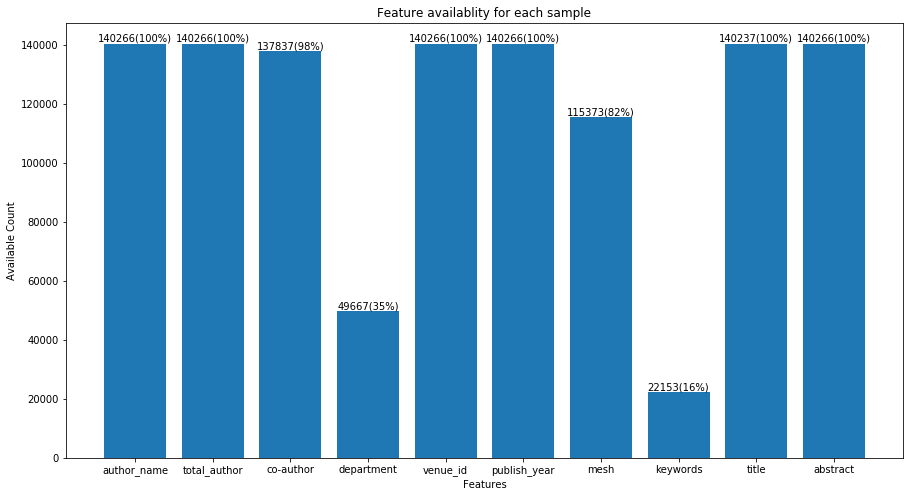

In [23]:
# plot data missing
labels = list(not_available_count.keys())
count = [total_record-count for count in list(not_available_count.values())]
# start plot
# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.bar(y_positions, count)
rects = ax.patches
for rect, count in zip(rects, count):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, str(count)+"("+"{0:.0%}".format(count/total_record)+")", ha = "center", va = "bottom")
#plt.xticks(labels)
plt.xticks(y_positions, labels)
plt.xlabel('Features')
plt.ylabel('Available Count')
plt.title('Feature availablity for each sample')
plt.legend()
plt.show()
#fig.savefig("../Data/"+Dataset+"/statistic_figs/labeled_feature_availablity.png", dpi=fig.dpi)

In [24]:
# find total number of papers using set
paperIDs = set(LabeledRecords["paperID"])
print("Total labeled papers:", len(paperIDs))

# find total number of author
authorIDs = set(LabeledRecords["authorID"])
print("Total number of author in labeled papers:", len(authorIDs))

# count number of paper each author write based on author ID
paperCounter = Counter([record["authorID"] for record in LabeledRecords_original])
print(paperCounter.most_common(3))

Total labeled papers: 135796
Total number of author in labeled papers: 9914
[('0000-0002-2381-2349', 587), ('0000-0002-9955-6003', 487), ('0000-0002-4295-6129', 423)]


In [25]:
# find number of author, sample for each name group
# find number of author, sample pass certain threshold
fileDir = "../Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)

threshold = 30
author_groups = []
total_author_count = []
total_sample_count = []

for file in listfiles:
    # group name
    temp = file.split("_")
    name = temp[1]+"_"+temp[-1]
    print("For name: ",name)
    # read needed content in labeled file
    labeled_data_part = read_labeled_file(fileDir+file)
    print("total sample size before apply threshold: ",len(labeled_data_part))
    # count number of paper each author write based on author ID
    paperCounter = Counter(labeled_data_part["authorID"])
    # collect statistic after apply threshold
    threshold_change = []
    num_of_author = []
    num_of_sample = []
    for i in range(1, threshold):
        for k in list(paperCounter):
            if paperCounter[k] < i:
                del paperCounter[k]
        temp =list(paperCounter.keys())
        num_of_author.append(len(temp))
        # remove samples that are smaller than threshold
        labeled_data_part = labeled_data_part[labeled_data_part.authorID.isin(temp)]
        num_of_sample.append(len(labeled_data_part))
    author_groups.append(name)
    total_author_count.append(num_of_author)
    total_sample_count.append(num_of_sample)

For name:  j_read
total sample size before apply threshold:  136
For name:  f_esteves
total sample size before apply threshold:  34
For name:  c_miller
total sample size before apply threshold:  252
For name:  r_jha
total sample size before apply threshold:  11
For name:  a_lowe
total sample size before apply threshold:  102
For name:  a_vega
total sample size before apply threshold:  20
For name:  k_smith
total sample size before apply threshold:  338
For name:  j_gordon
total sample size before apply threshold:  19
For name:  s_liao
total sample size before apply threshold:  104
For name:  j_qian
total sample size before apply threshold:  17
For name:  s_bernardi
total sample size before apply threshold:  91
For name:  t_hill
total sample size before apply threshold:  15
For name:  s_schindler
total sample size before apply threshold:  51
For name:  j_williams
total sample size before apply threshold:  625
For name:  s_jacobson
total sample size before apply threshold:  28
For name: 

total sample size before apply threshold:  202
For name:  a_nielsen
total sample size before apply threshold:  132
For name:  j_conde
total sample size before apply threshold:  84
For name:  k_wright
total sample size before apply threshold:  59
For name:  m_parker
total sample size before apply threshold:  280
For name:  h_huang
total sample size before apply threshold:  224
For name:  j_terry
total sample size before apply threshold:  57
For name:  y_xu
total sample size before apply threshold:  137
For name:  a_melo
total sample size before apply threshold:  48
For name:  r_doyle
total sample size before apply threshold:  11
For name:  m_bernardo
total sample size before apply threshold:  250
For name:  j_soares
total sample size before apply threshold:  49
For name:  j_richard
total sample size before apply threshold:  179
For name:  p_robinson
total sample size before apply threshold:  275
For name:  c_zou
total sample size before apply threshold:  32
For name:  s_rana
total sampl

total sample size before apply threshold:  42
For name:  n_harris
total sample size before apply threshold:  14
For name:  s_hill
total sample size before apply threshold:  152
For name:  p_pathak
total sample size before apply threshold:  9
For name:  h_zeng
total sample size before apply threshold:  82
For name:  h_liu
total sample size before apply threshold:  439
For name:  s_bae
total sample size before apply threshold:  83
For name:  s_fernandes
total sample size before apply threshold:  38
For name:  a_miller
total sample size before apply threshold:  109
For name:  a_eklund
total sample size before apply threshold:  118
For name:  r_moore
total sample size before apply threshold:  221
For name:  m_thomsen
total sample size before apply threshold:  98
For name:  l_ng
total sample size before apply threshold:  44
For name:  a_phillips
total sample size before apply threshold:  170
For name:  y_ye
total sample size before apply threshold:  85
For name:  m_guerreiro
total sample si

For name:  w_zheng
total sample size before apply threshold:  93
For name:  j_franco
total sample size before apply threshold:  85
For name:  l_walker
total sample size before apply threshold:  194
For name:  a_gordon
total sample size before apply threshold:  126
For name:  z_yin
total sample size before apply threshold:  52
For name:  c_gu
total sample size before apply threshold:  65
For name:  a_soto
total sample size before apply threshold:  32
For name:  h_hsieh
total sample size before apply threshold:  70
For name:  m_crespo
total sample size before apply threshold:  49
For name:  s_phillips
total sample size before apply threshold:  183
For name:  r_rodrigues
total sample size before apply threshold:  74
For name:  a_mansour
total sample size before apply threshold:  15
For name:  a_lau
total sample size before apply threshold:  35
For name:  j_berg
total sample size before apply threshold:  171
For name:  l_wilson
total sample size before apply threshold:  59
For name:  c_par

For name:  t_becker
total sample size before apply threshold:  21
For name:  s_pedersen
total sample size before apply threshold:  322
For name:  a_ali
total sample size before apply threshold:  62
For name:  k_jones
total sample size before apply threshold:  607
For name:  m_becker
total sample size before apply threshold:  67
For name:  c_marshall
total sample size before apply threshold:  106
For name:  s_rafiq
total sample size before apply threshold:  33
For name:  h_liang
total sample size before apply threshold:  104
For name:  c_davis
total sample size before apply threshold:  43
For name:  e_hall
total sample size before apply threshold:  115
For name:  g_volpe
total sample size before apply threshold:  31
For name:  r_lewis
total sample size before apply threshold:  427
For name:  c_rodriguez
total sample size before apply threshold:  43
For name:  p_hall
total sample size before apply threshold:  22
For name:  r_srivastava
total sample size before apply threshold:  184
For n

For name:  v_gupta
total sample size before apply threshold:  238
For name:  j_manning
total sample size before apply threshold:  16
For name:  r_wood
total sample size before apply threshold:  97
For name:  y_ding
total sample size before apply threshold:  106
For name:  j_rasmussen
total sample size before apply threshold:  33
For name:  n_lee
total sample size before apply threshold:  108
For name:  a_oliveira
total sample size before apply threshold:  302
For name:  h_yin
total sample size before apply threshold:  130
For name:  k_brown
total sample size before apply threshold:  231
For name:  s_hong
total sample size before apply threshold:  383
For name:  l_zhou
total sample size before apply threshold:  49
For name:  h_jiang
total sample size before apply threshold:  135
For name:  a_lewis
total sample size before apply threshold:  98
For name:  c_meyer
total sample size before apply threshold:  136
For name:  a_islam
total sample size before apply threshold:  18
For name:  k_fu

For name:  c_chien
total sample size before apply threshold:  157
For name:  s_yun
total sample size before apply threshold:  102
For name:  s_jung
total sample size before apply threshold:  76
For name:  e_gomes
total sample size before apply threshold:  40
For name:  t_yamaguchi
total sample size before apply threshold:  62
For name:  p_oliveira
total sample size before apply threshold:  358
For name:  r_torres
total sample size before apply threshold:  40
For name:  a_esteves
total sample size before apply threshold:  63
For name:  l_stevens
total sample size before apply threshold:  77
For name:  a_chang
total sample size before apply threshold:  178
For name:  l_song
total sample size before apply threshold:  58
For name:  j_delgado
total sample size before apply threshold:  123
For name:  p_jensen
total sample size before apply threshold:  319
For name:  t_allen
total sample size before apply threshold:  48
For name:  j_sullivan
total sample size before apply threshold:  79
For n

For name:  m_mukherjee
total sample size before apply threshold:  16
For name:  j_schroeder
total sample size before apply threshold:  150
For name:  a_mayer
total sample size before apply threshold:  17
For name:  e_wright
total sample size before apply threshold:  28
For name:  c_moreno
total sample size before apply threshold:  136
For name:  a_moura
total sample size before apply threshold:  36
For name:  j_lopez
total sample size before apply threshold:  122
For name:  a_logan
total sample size before apply threshold:  26
For name:  l_williams
total sample size before apply threshold:  42
For name:  h_young
total sample size before apply threshold:  109
For name:  a_vincent
total sample size before apply threshold:  79
For name:  a_monteiro
total sample size before apply threshold:  132
For name:  d_park
total sample size before apply threshold:  156
For name:  d_gao
total sample size before apply threshold:  23
For name:  d_quinn
total sample size before apply threshold:  145
For

For name:  r_singh
total sample size before apply threshold:  197
For name:  c_baker
total sample size before apply threshold:  112
For name:  a_cattaneo
total sample size before apply threshold:  196
For name:  a_ferrari
total sample size before apply threshold:  114
For name:  a_murphy
total sample size before apply threshold:  178
For name:  f_hong
total sample size before apply threshold:  41
For name:  m_ferrari
total sample size before apply threshold:  150
For name:  j_paredes
total sample size before apply threshold:  68
For name:  z_zhao
total sample size before apply threshold:  186
For name:  j_cao
total sample size before apply threshold:  39
For name:  d_kuo
total sample size before apply threshold:  34
For name:  a_andersen
total sample size before apply threshold:  18
For name:  m_longo
total sample size before apply threshold:  44
For name:  h_chiang
total sample size before apply threshold:  44
For name:  m_o'brien
total sample size before apply threshold:  34
For name

In [26]:
print("Total author groups: ",len(author_groups))
print(author_groups[:3])
print(total_author_count[:3])
print(total_sample_count[:3])
row_totals_authors = [sum(x) for x in zip(*total_author_count)]
row_totals_samples = [sum(x) for x in zip(*total_sample_count)]
print(row_totals_authors)
print(row_totals_samples)

Total author groups:  1132
['j_read', 'f_esteves', 'c_miller']
[[8, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [14, 11, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 4, 4, 4, 4, 4, 3, 3]]
[[136, 133, 133, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], [34, 33, 33, 30, 30, 30, 30, 30, 30, 30, 30, 30, 18, 18, 18, 18, 18, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [252, 249, 247, 247, 247, 247, 235, 235, 235, 235, 235, 235, 235, 235, 235, 220, 220, 220, 220, 201, 201, 201, 157, 157, 157, 157, 157, 130, 130]]
[9914, 7562, 6503, 5783, 5211, 4757, 4366, 4043, 3748, 3475, 3259, 3036, 2854, 2684, 2512, 2360, 2223, 2081, 1974, 1875, 1784, 1710, 1636, 1564, 1496, 1440, 1381, 1327, 1267]
[140266, 137914, 135796, 133636, 131348, 129078, 126732, 124471, 122111, 119654, 11749

In [ ]:
# plot author number change wrt threshold
threshold_change = range(1, threshold)
fig, ax = plt.subplots()
ax.plot(threshold_change, row_totals_authors)
ax.set(xlabel='Threshold', ylabel='Total Authors',
       title='How threshold change effect the number of authors in dataset')
plt.show()
#fig.savefig("../Data/"+Dataset+"/statistic_figs/threshold_change.png", dpi=fig.dpi)

In [ ]:
# plot sample number change wrt threshold
fig1, ax1 = plt.subplots()
ax1.plot(threshold_change, row_totals_samples)
ax1.set(xlabel='Threshold', ylabel='Total Samples',
       title='How threshold change effect the number of samples in dataset')
plt.show()

In [6]:
# find number of sample for each author
# find number of author, sample pass certain threshold
fileDir = "../Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)

threshold = 30
author_groups = []
total_author_count = []
total_sample_count = []

for file in listfiles:
    # group name
    temp = file.split("_")
    name = temp[1]+"_"+temp[-1]
    print("For name: ",name)
    # read needed content in labeled file
    labeled_data_part = read_labeled_file(fileDir+file)
    print("total sample size before apply threshold: ",len(labeled_data_part))
    # count number of paper each author write based on author ID
    paperCounter = Counter(labeled_data_part["authorID"])
    # collect statistic after apply threshold
    for k in list(paperCounter):
        if paperCounter[k] < threshold:
            del paperCounter[k]
    temp =list(paperCounter.keys())
    # remove samples that are smaller than threshold
    labeled_data_part = labeled_data_part[labeled_data_part.authorID.isin(temp)]
    if len(temp)>0:
        author_groups.append(name)
        total_author_count.append(len(temp))
        total_sample_count.append(len(labeled_data_part))

For name:  j_read
total sample size before apply threshold:  136
For name:  f_esteves
total sample size before apply threshold:  34
For name:  c_miller
total sample size before apply threshold:  252
For name:  r_jha
total sample size before apply threshold:  11
For name:  a_lowe
total sample size before apply threshold:  102
For name:  a_vega
total sample size before apply threshold:  20
For name:  k_smith
total sample size before apply threshold:  338
For name:  j_gordon
total sample size before apply threshold:  19
For name:  s_liao
total sample size before apply threshold:  104
For name:  j_qian
total sample size before apply threshold:  17
For name:  s_bernardi
total sample size before apply threshold:  91
For name:  t_hill
total sample size before apply threshold:  15
For name:  s_schindler
total sample size before apply threshold:  51
For name:  j_williams
total sample size before apply threshold:  625
For name:  s_jacobson
total sample size before apply threshold:  28
For name: 

For name:  s_moon
total sample size before apply threshold:  85
For name:  r_pereira
total sample size before apply threshold:  202
For name:  a_nielsen
total sample size before apply threshold:  132
For name:  j_conde
total sample size before apply threshold:  84
For name:  k_wright
total sample size before apply threshold:  59
For name:  m_parker
total sample size before apply threshold:  280
For name:  h_huang
total sample size before apply threshold:  224
For name:  j_terry
total sample size before apply threshold:  57
For name:  y_xu
total sample size before apply threshold:  137
For name:  a_melo
total sample size before apply threshold:  48
For name:  r_doyle
total sample size before apply threshold:  11
For name:  m_bernardo
total sample size before apply threshold:  250
For name:  j_soares
total sample size before apply threshold:  49
For name:  j_richard
total sample size before apply threshold:  179
For name:  p_robinson
total sample size before apply threshold:  275
For nam

total sample size before apply threshold:  38
For name:  a_miller
total sample size before apply threshold:  109
For name:  a_eklund
total sample size before apply threshold:  118
For name:  r_moore
total sample size before apply threshold:  221
For name:  m_thomsen
total sample size before apply threshold:  98
For name:  l_ng
total sample size before apply threshold:  44
For name:  a_phillips
total sample size before apply threshold:  170
For name:  y_ye
total sample size before apply threshold:  85
For name:  m_guerreiro
total sample size before apply threshold:  36
For name:  g_alves
total sample size before apply threshold:  60
For name:  m_mohammed
total sample size before apply threshold:  6
For name:  s_mohammadi
total sample size before apply threshold:  59
For name:  c_chao
total sample size before apply threshold:  155
For name:  s_teixeira
total sample size before apply threshold:  36
For name:  l_almeida
total sample size before apply threshold:  133
For name:  y_tseng
tota

total sample size before apply threshold:  82
For name:  m_coelho
total sample size before apply threshold:  93
For name:  j_pearson
total sample size before apply threshold:  119
For name:  z_xie
total sample size before apply threshold:  99
For name:  m_wright
total sample size before apply threshold:  379
For name:  j_song
total sample size before apply threshold:  248
For name:  k_becker
total sample size before apply threshold:  394
For name:  r_sinha
total sample size before apply threshold:  27
For name:  c_turner
total sample size before apply threshold:  88
For name:  y_su
total sample size before apply threshold:  190
For name:  a_popov
total sample size before apply threshold:  135
For name:  w_liao
total sample size before apply threshold:  79
For name:  j_zhong
total sample size before apply threshold:  280
For name:  a_wheeler
total sample size before apply threshold:  138
For name:  m_walsh
total sample size before apply threshold:  37
For name:  r_figueiredo
total sampl

total sample size before apply threshold:  313
For name:  j_koh
total sample size before apply threshold:  62
For name:  m_amin
total sample size before apply threshold:  13
For name:  h_cho
total sample size before apply threshold:  73
For name:  s_lam
total sample size before apply threshold:  90
For name:  t_tran
total sample size before apply threshold:  54
For name:  c_su
total sample size before apply threshold:  297
For name:  s_george
total sample size before apply threshold:  78
For name:  j_hong
total sample size before apply threshold:  143
For name:  p_baptista
total sample size before apply threshold:  114
For name:  p_thompson
total sample size before apply threshold:  148
For name:  a_castro
total sample size before apply threshold:  126
For name:  j_zhang
total sample size before apply threshold:  965
For name:  j_rodrigues
total sample size before apply threshold:  264
For name:  s_watson
total sample size before apply threshold:  117
For name:  c_barros
total sample s

For name:  r_turner
total sample size before apply threshold:  147
For name:  s_brooks
total sample size before apply threshold:  58
For name:  p_moreira
total sample size before apply threshold:  217
For name:  s_mukhopadhyay
total sample size before apply threshold:  119
For name:  a_hudson
total sample size before apply threshold:  129
For name:  d_thomas
total sample size before apply threshold:  62
For name:  w_smith
total sample size before apply threshold:  61
For name:  l_martin
total sample size before apply threshold:  253
For name:  c_garcia
total sample size before apply threshold:  106
For name:  g_huang
total sample size before apply threshold:  160
For name:  j_huber
total sample size before apply threshold:  96
For name:  j_qin
total sample size before apply threshold:  96
For name:  t_ho
total sample size before apply threshold:  83
For name:  c_keller
total sample size before apply threshold:  15
For name:  m_maia
total sample size before apply threshold:  99
For name

total sample size before apply threshold:  126
For name:  c_jones
total sample size before apply threshold:  354
For name:  k_hong
total sample size before apply threshold:  127
For name:  t_williams
total sample size before apply threshold:  190
For name:  j_xavier
total sample size before apply threshold:  22
For name:  b_bhushan
total sample size before apply threshold:  187
For name:  r_ellis
total sample size before apply threshold:  176
For name:  v_saini
total sample size before apply threshold:  18
For name:  a_ellis
total sample size before apply threshold:  168
For name:  f_reis
total sample size before apply threshold:  222
For name:  j_gray
total sample size before apply threshold:  112
For name:  r_hughes
total sample size before apply threshold:  57
For name:  a_green
total sample size before apply threshold:  169
For name:  c_reis
total sample size before apply threshold:  77
For name:  f_scott
total sample size before apply threshold:  26
For name:  l_han
total sample s

total sample size before apply threshold:  55
For name:  m_pinheiro
total sample size before apply threshold:  54
For name:  j_petersen
total sample size before apply threshold:  41
For name:  k_shimizu
total sample size before apply threshold:  103
For name:  p_shaw
total sample size before apply threshold:  57
For name:  g_coppola
total sample size before apply threshold:  142
For name:  a_sinclair
total sample size before apply threshold:  109
For name:  y_pan
total sample size before apply threshold:  46
For name:  m_ramos
total sample size before apply threshold:  251
For name:  j_tsai
total sample size before apply threshold:  153
For name:  f_dai
total sample size before apply threshold:  34
For name:  t_martin
total sample size before apply threshold:  83
For name:  t_o'brien
total sample size before apply threshold:  262
For name:  s_may
total sample size before apply threshold:  115
For name:  z_cai
total sample size before apply threshold:  244
For name:  a_pereira
total sam

total sample size before apply threshold:  612
For name:  j_soto
total sample size before apply threshold:  64
For name:  r_mckay
total sample size before apply threshold:  53
For name:  d_sharma
total sample size before apply threshold:  60
For name:  a_wilson
total sample size before apply threshold:  252
For name:  f_marini
total sample size before apply threshold:  65
For name:  h_tsai
total sample size before apply threshold:  93
For name:  s_o'brien
total sample size before apply threshold:  32
For name:  c_webb
total sample size before apply threshold:  35
For name:  c_adams
total sample size before apply threshold:  69
For name:  c_peng
total sample size before apply threshold:  103
For name:  k_kobayashi
total sample size before apply threshold:  35
For name:  s_larsen
total sample size before apply threshold:  68


In [7]:
import heapq
print("Total author groups: ",len(author_groups))
print(author_groups[:3])
print(total_author_count[:3])
print(total_sample_count[:3])
print(sum(total_author_count))
print(sum(total_sample_count))

# find top 10 most ambiguity group
ambiguity_index = heapq.nlargest(10, range(len(total_author_count)), total_author_count.__getitem__)
print(ambiguity_index)
ambiguity_author = [author_groups[i] for i in ambiguity_index]
print("Most ambiguity group: ", ambiguity_author)
print("Most ambiguity group author count: ",heapq.nlargest(10, total_author_count))


Total author groups:  651
['j_read', 'c_miller', 'a_lowe']
[3, 3, 1]
[127, 130, 69]
1207
81444
[609, 118, 184, 626, 7, 271, 464, 545, 618, 286]
Most ambiguity group:  ['j_kim', 'y_wang', 'j_chen', 'l_wang', 'k_kim', 'y_zhang', 'h_chen', 'y_liu', 'h_wang', 'a_silva']
Most ambiguity group author count:  [20, 16, 12, 10, 8, 8, 8, 8, 8, 7]
